In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Copy utils and signnames
!cp /content/gdrive/MyDrive/University/Fourth\ Year\ \(2020-2021\)/ECE532/Google\ Collab/utils.py .
!cp /content/gdrive/MyDrive/University/Fourth\ Year\ \(2020-2021\)/ECE532/Google\ Collab/signnames.csv .

In [ ]:
import pickle

#PyTorch Setup

In [ ]:
import numpy as np
from datetime import datetime 

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

from torchvision import datasets, transforms

import matplotlib.pyplot as plt

# check device
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
DEVICE

'cpu'

In [ ]:
%config InlineBackend.figure_format = 'retina'

In [ ]:
# parameters
RANDOM_SEED = 42
LEARNING_RATE = 0.001
BATCH_SIZE = 512 # TODO: Change batch size
N_EPOCHS = 15 # TODO: Change number of epochs

IMG_SIZE = 32
N_CLASSES = 43

#Data Loading

In [ ]:
# Visualizations will be shown in the notebook.
%matplotlib inline
from importlib import reload
import utils; reload(utils) # TODO: Need to upload utils.py to colab filesystem
from utils import *

In [ ]:
datasets_path = F"/content/gdrive/MyDrive/University/Fourth Year (2020-2021)/ECE532/Google Collab/dataset/"

training_file = datasets_path + 'train.p'
validation_file= datasets_path + 'valid.p'
testing_file = datasets_path + 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [ ]:
# Convert to grayscale and correct dimensions
X_train = np.asarray(list(map(lambda img: np.expand_dims(to_grayscale(img), (0)), X_train))) 
X_valid = np.asarray(list(map(lambda img: np.expand_dims(to_grayscale(img), (0)), X_valid))) 
X_test = np.asarray(list(map(lambda img: np.expand_dims(to_grayscale(img), (0)), X_test))) 

In [ ]:
def imshow(img):
    # img = img / 2 + 0.5     # unnormalize
    # npimg = img.numpy()
    img = img.squeeze()
    plt.imshow(img, cmap='gray')
    plt.show()

def class_id_to_label(id):
  sign_names = pd.read_csv("signnames.csv")
  return sign_names['SignName'][id]

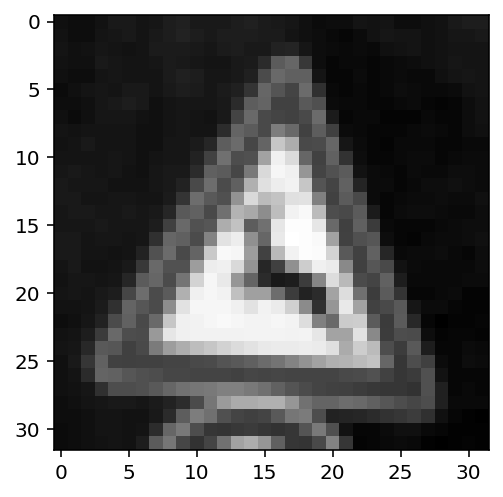

31 Wild animals crossing


In [ ]:
imshow(X_train[800])
print(y_train[800], class_id_to_label(y_train[800].item()))

In [ ]:
# Create Training Dataloader
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)

train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
# Create Valid Dataloader
X_valid = torch.Tensor(X_valid)
y_valid = torch.Tensor(y_valid)

valid_dataset = TensorDataset(X_valid, y_valid)
valid_dataloader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
# Create Valid Dataloader
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, shuffle=True)

In [ ]:
f = open("wild_animal.hex", 'w')

for pixel in torch.flatten(torch.reshape(X_train[800], (32, 32, 1))):
  f.write(hex(int(pixel.numpy())).lstrip("0x") + "\n")

f.close()

In [ ]:
# Load sign names file
sign_names = pd.read_csv("signnames.csv")
sign_names.set_index("ClassId")

,SignName
ClassId,
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,Speed limit (50km/h)
3,Speed limit (60km/h)
4,Speed limit (70km/h)
5,Speed limit (80km/h)
6,End of speed limit (80km/h)
7,Speed limit (100km/h)
8,Speed limit (120km/h)


In [ ]:
!mkdir sign_names

In [ ]:
from PIL import Image, ImageDraw, ImageFont

keepcharacters = (' ','.','_')
W, H = 500, 50

directory = '/content/gdrive/MyDrive/University/Fourth Year (2020-2021)/ECE532/sign_labels/'
font = ImageFont.truetype(font='./OpenSans-Bold.ttf', size=16)

with open(directory + 'txt/label.txt', 'w+') as f:
  for class_id, sign_name in sign_names.itertuples(index=False):
    sign_name = "".join(c for c in sign_name if c.isalnum() or c in keepcharacters).rstrip()
    img = Image.new('L', (W, H))
    d = ImageDraw.Draw(img)
    w, h = d.textsize(sign_name, font=font)
    d.text(((W-w)/2,(H-h)/2), sign_name, fill="white", font=font)
    img.save(directory + sign_name + '.png')
    
    img = Image.open(directory + sign_name + '.png').convert('L')                  
    img = np.array(img).flatten()

    f.write(str("unsigned int class_" + str(class_id) + "[] = {"))

    string = ""
    for i, pixel in enumerate(img):
      if i < len(img)-1:
        string += str(pixel) + ','
    f.write(string.rstrip(',') + '};\n')

In [ ]:
# import os
# import numpy as np
# from PIL import Image, ImageDraw, ImageFont

# directory = '/content/gdrive/MyDrive/University/Fourth Year (2020-2021)/ECE532/sign_labels/'


# with open(directory + 'txt/label.txt', 'w+') as f:
#   for i, filename in enumerate(os.listdir(directory)):
#     if os.path.isfile(os.path.join(directory, filename)):
#       img = Image.open(directory + filename).convert('L')                  
#       img = np.array(img).flatten()
  
#       f.write(str("unsigned int class_" + str(i) + "[] = {"))

#       string = ""
#       for i, pixel in enumerate(img):
#         if i < len(img)-1:
#           string += str(pixel) + ','
#       f.write(string.rstrip(',') + '}\n')

#Helper Functions

In [ ]:
def get_accuracy(model, data_loader, device):
    '''
    Function for computing the accuracy of the predictions over the entire data_loader
    '''
    
    correct_pred = 0 
    n = 0
    
    with torch.no_grad():
        model.eval()
        for X, y_true in data_loader:

            X = X.to(device)
            y_true = y_true.type(torch.LongTensor).to(device)

            _, y_prob, _ = model(X)
            _, predicted_labels = torch.max(y_prob, 1)

            n += y_true.size(0)
            correct_pred += (predicted_labels == y_true).sum()

    return correct_pred.float() / n

def plot_losses(train_losses, valid_losses):
    '''
    Function for plotting training and validation losses
    '''
    
    # temporarily change the style of the plots to seaborn 
    plt.style.use('seaborn')

    train_losses = np.array(train_losses) 
    valid_losses = np.array(valid_losses)

    fig, ax = plt.subplots(figsize = (8, 4.5))

    ax.plot(train_losses, color='blue', label='Training loss') 
    ax.plot(valid_losses, color='red', label='Validation loss')
    ax.set(title="Loss over epochs", 
            xlabel='Epoch',
            ylabel='Loss') 
    ax.legend()
    fig.show()
    
    # change the plot style to default
    plt.style.use('default')
    
def train(train_loader, model, criterion, optimizer, device):
    '''
    Function for the training step of the training loop
    '''

    model.train()
    running_loss = 0
    
    for X, y_true in train_loader:

        optimizer.zero_grad()
        
        X = X.to(device)
        y_true = y_true.type(torch.LongTensor).to(device)
    
        # Forward pass
        y_hat, _, _ = model(X)

        loss = criterion(y_hat, y_true.long()) 
        running_loss += loss.item() * X.size(0)

        # Backward pass
        loss.backward()
        optimizer.step()
        
    epoch_loss = running_loss / len(train_loader.dataset)
    return model, optimizer, epoch_loss

def validate(valid_loader, model, criterion, device):
    '''
    Function for the validation step of the training loop
    '''
   
    model.eval()
    running_loss = 0
    
    for X, y_true in valid_loader:
    
        X = X.to(device)
        y_true = y_true.type(torch.LongTensor).to(device)

        # Forward pass and record loss
        y_hat, _, _ = model(X) 
        
        loss = criterion(y_hat, y_true.long()) 
        running_loss += loss.item() * X.size(0)

    epoch_loss = running_loss / len(valid_loader.dataset)
        
    return model, epoch_loss

def training_loop(model, criterion, optimizer, train_loader, valid_loader, epochs, device, print_every=1):
    '''
    Function defining the entire training loop
    '''
    
    # set objects for storing metrics
    best_loss = 1e10
    train_losses = []
    valid_losses = []
 
    # Train model
    for epoch in range(0, epochs):

        # training
        model, optimizer, train_loss = train(train_loader, model, criterion, optimizer, device)
        train_losses.append(train_loss)

        # validation
        with torch.no_grad():
            model, valid_loss = validate(valid_loader, model, criterion, device)
            valid_losses.append(valid_loss)

        if epoch % print_every == (print_every - 1):
            
            train_acc = get_accuracy(model, train_loader, device=device)
            valid_acc = get_accuracy(model, valid_loader, device=device)
                
            print(f'{datetime.now().time().replace(microsecond=0)} --- '
                  f'Epoch: {epoch}\t'
                  f'Train loss: {train_loss:.4f}\t'
                  f'Valid loss: {valid_loss:.4f}\t'
                  f'Train accuracy: {100 * train_acc:.2f}\t'
                  f'Valid accuracy: {100 * valid_acc:.2f}')

    plot_losses(train_losses, valid_losses)
    
    return model, optimizer, (train_losses, valid_losses)

In [ ]:
models_path = F"/content/gdrive/MyDrive/University/Fourth Year (2020-2021)/ECE532/Google Collab/model_checkpoints/PyTorch/"

#EdLeNet-5

In [ ]:
class EdLeNet5(nn.Module):
    def __init__(self, n_classes):
        super(EdLeNet5, self).__init__()

        # Quantization
        self.quant = torch.quantization.QuantStub()
        self.dequant = torch.quantization.DeQuantStub()
        # Feature Extractor Layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1)
        self.relu1 = nn.ReLU()
        self.max_pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1)
        self.relu2 = nn.ReLU()
        self.max_pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1)
        self.relu3 = nn.ReLU()
        self.max_pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        # Classifier Layers
        self.fc1 = nn.Linear(in_features=2*2*128, out_features=120)
        self.relu_fc1 = nn.ReLU()
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.relu_fc2 = nn.ReLU()
        self.fc3 = nn.Linear(in_features=84, out_features=n_classes)        

    def forward(self, x):        
        activations = dict()
        activations['input'] = x
        x = self.quant(x)
        activations['quant'] = x
        x = self.conv1(x)
        activations['conv1'] = x
        x = self.relu1(x)
        activations['relu1'] = x
        x = self.max_pool1(x)
        activations['max_pool1'] = x
        x = self.conv2(x)
        activations['conv2'] = x
        x = self.relu2(x)
        activations['relu2'] = x
        x = self.max_pool2(x)
        activations['max_pool2'] = x
        x = self.conv3(x)
        activations['conv3'] = x
        x = self.relu3(x)
        activations['relu3'] = x
        x = self.max_pool3(x)
        activations['max_pool3'] = x        
        x = torch.flatten(x, 1)
        activations['fc_input'] = x
        x = self.fc1(x)
        activations['fc1'] = x
        x = self.relu_fc1(x)
        activations['relu_fc1'] = x
        x = self.fc2(x)
        activations['fc2'] = x
        x = self.relu_fc2(x)
        activations['relu_fc2'] = x
        logits = self.fc3(x)
        activations['fc3'] = x
        logits = self.dequant(logits)
        probs = F.softmax(logits, dim=1)
        return logits, probs, activations

#Training

In [ ]:
torch.manual_seed(RANDOM_SEED)
model = EdLeNet5(N_CLASSES).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.CrossEntropyLoss()

## Quantization Aware Training

In [ ]:
# model_qat = model
# model.train()
# model.qconfig = torch.quantization.get_default_qat_qconfig('fbgemm')
# # model_fused = torch.quantization.fuse_modules(model,[['conv', 'relu']])
# model_qat = torch.quantization.prepare_qat(model)

/usr/local/lib/python3.7/dist-packages/torch/quantization/observer.py:123: UserWarning: Please use quant_min and quant_max to specify the range for observers.                     reduce_range will be deprecated in a future release of PyTorch.
  reduce_range will be deprecated in a future release of PyTorch."


17:58:14 --- Epoch: 0	Train loss: 2.6582	Valid loss: 1.5990	Train accuracy: 64.76	Valid accuracy: 59.14
17:58:16 --- Epoch: 1	Train loss: 0.8357	Valid loss: 0.7876	Train accuracy: 88.97	Valid accuracy: 80.34
17:58:17 --- Epoch: 2	Train loss: 0.3525	Valid loss: 0.5311	Train accuracy: 94.87	Valid accuracy: 86.85
17:58:19 --- Epoch: 3	Train loss: 0.2029	Valid loss: 0.5299	Train accuracy: 96.89	Valid accuracy: 88.53
17:58:21 --- Epoch: 4	Train loss: 0.1294	Valid loss: 0.4090	Train accuracy: 98.00	Valid accuracy: 90.86
17:58:22 --- Epoch: 5	Train loss: 0.0997	Valid loss: 0.5156	Train accuracy: 98.42	Valid accuracy: 90.88
17:58:24 --- Epoch: 6	Train loss: 0.0744	Valid loss: 0.4177	Train accuracy: 98.82	Valid accuracy: 91.75
17:58:25 --- Epoch: 7	Train loss: 0.0538	Valid loss: 0.4445	Train accuracy: 99.28	Valid accuracy: 91.86
17:58:27 --- Epoch: 8	Train loss: 0.0495	Valid loss: 0.3965	Train accuracy: 99.33	Valid accuracy: 92.81
17:58:28 --- Epoch: 9	Train loss: 0.0468	Valid loss: 0.3839	Trai

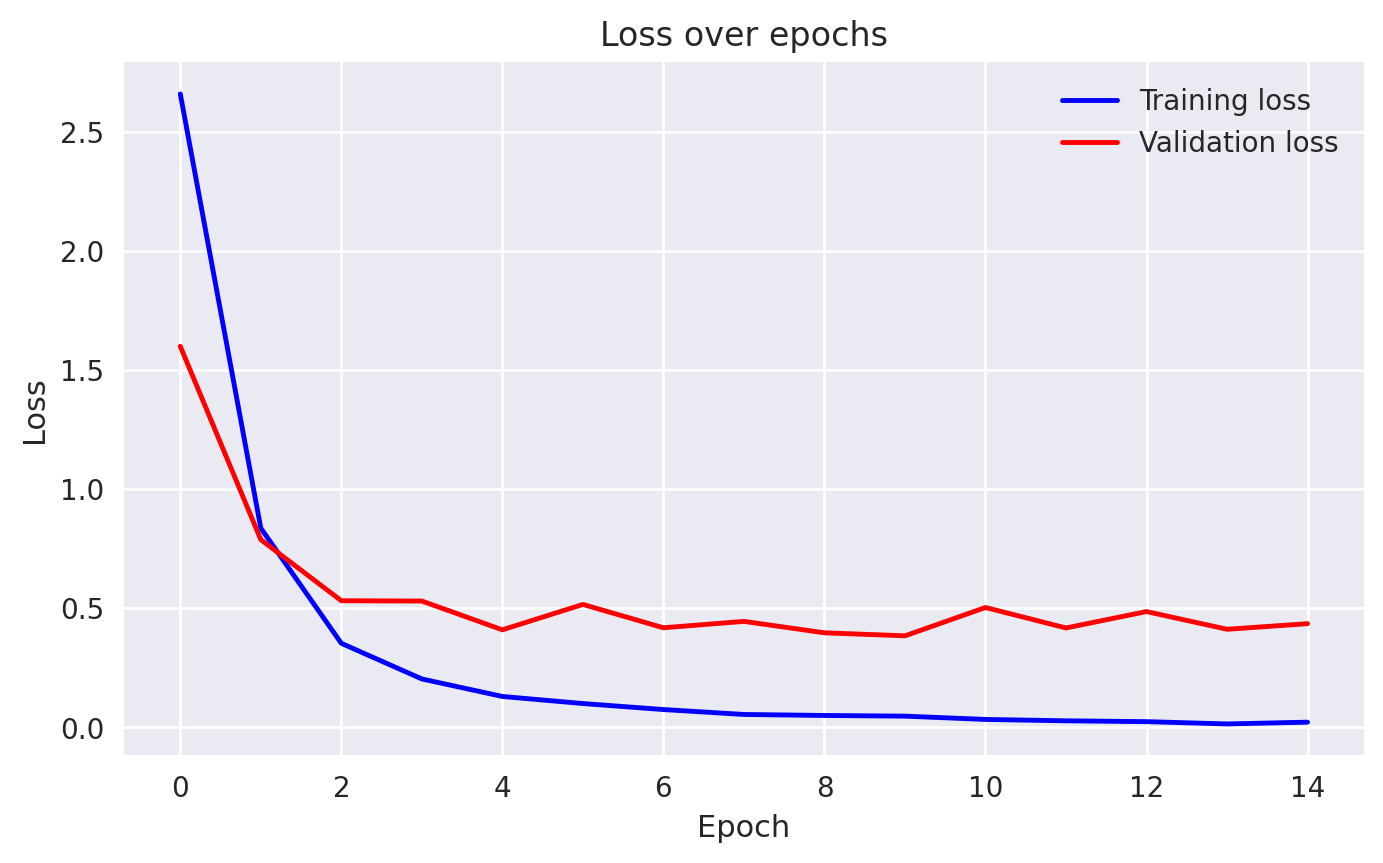

In [ ]:
model, optimizer, _ = training_loop(model, criterion, optimizer, train_dataloader, valid_dataloader, N_EPOCHS, DEVICE)

In [ ]:
# torch.save(model.state_dict(), models_path+"edlenet5_grayscale")

In [ ]:
def evaluate_model(model, dataloader, limit=10):
  model.eval()

  for i, data in enumerate(dataloader):
    imshow(data[0][i])
    pred = np.argmax(model(data[0][i].unsqueeze(0))[1].detach().numpy())
    print("Predicted Class: ", class_id_to_label(pred))
    
    if i > limit:
      break

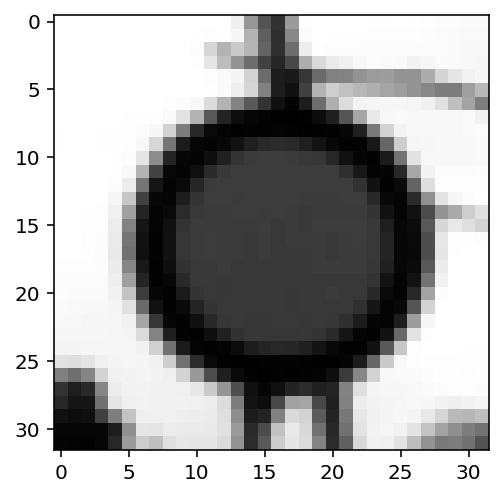

Predicted Class:  No vehicles


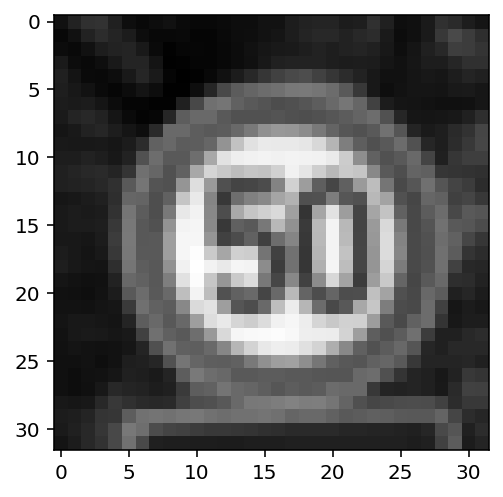

Predicted Class:  Speed limit (50km/h)


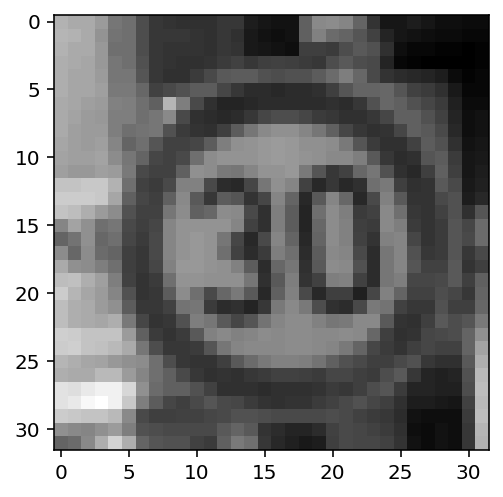

Predicted Class:  Speed limit (30km/h)


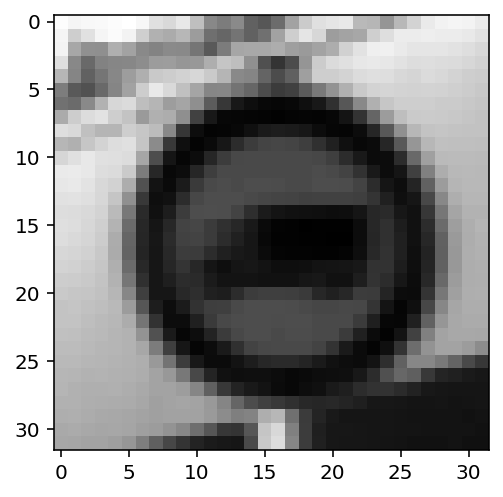

Predicted Class:  Vehicles over 3.5 metric tons prohibited


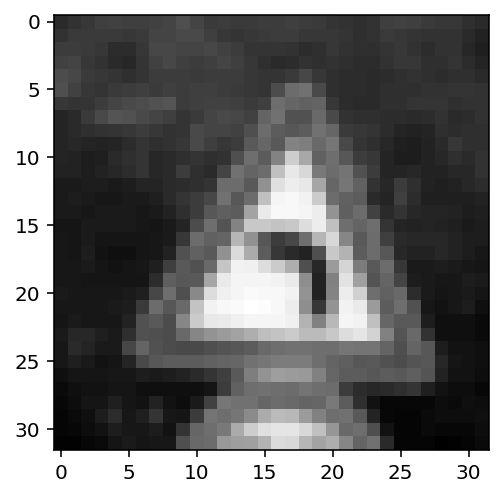

Predicted Class:  Dangerous curve to the left


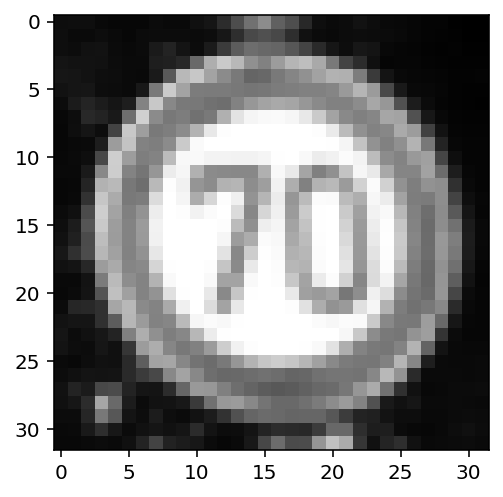

Predicted Class:  Stop


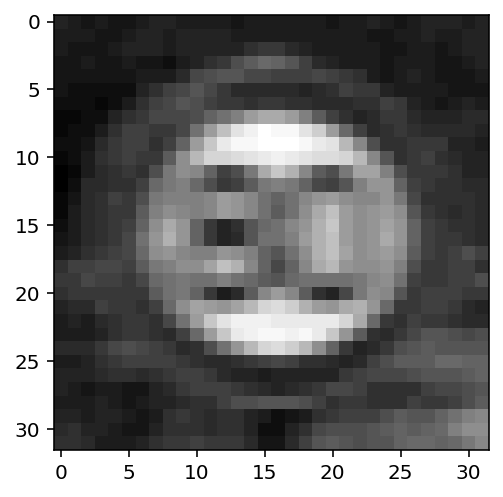

Predicted Class:  Speed limit (80km/h)


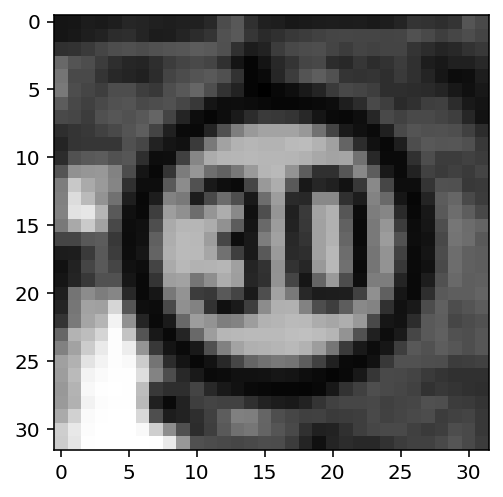

Predicted Class:  Speed limit (30km/h)


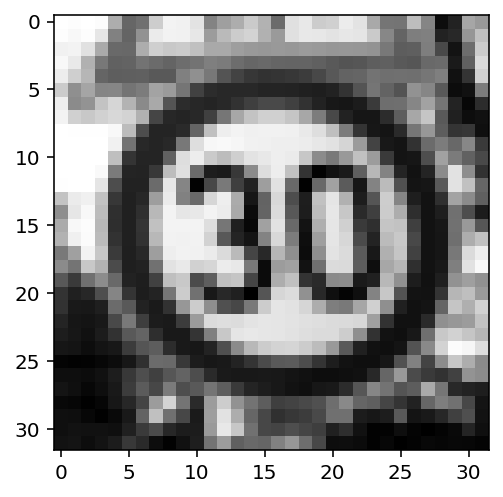

Predicted Class:  Speed limit (30km/h)


In [ ]:
evaluate_model(model_int8, valid_dataloader)

## Static Quantization

In [ ]:
# Load model
model_new = EdLeNet5(N_CLASSES)
model_new.load_state_dict(torch.load(models_path + "edlenet5_grayscale", map_location='cpu'))

<All keys matched successfully>

In [ ]:
# Source: https://pytorch.org/docs/stable/quantization.html

# model must be set to eval mode for static quantization logic to work
model_new.eval()

# attach a global qconfig, which contains information about what kind
# of observers to attach. Use 'fbgemm' for server inference and
# 'qnnpack' for mobile inference. Other quantization configurations such
# as selecting symmetric or assymetric quantization and MinMax or L2Norm
# calibration techniques can be specified here.
model_new.qconfig = torch.quantization.get_default_qconfig('fbgemm')

# Fuse the activations to preceding layers, where applicable.
# This needs to be done manually depending on the model architecture.
# Common fusions include `conv + relu` and `conv + batchnorm + relu`
# model= torch.quantization.fuse_modules(model, [['conv', 'relu']])

# Prepare the model for static quantization. This inserts observers in
# the model that will observe activation tensors during calibration.
model_new = torch.quantization.prepare(model_new, inplace=True)

# calibrate the prepared model to determine quantization parameters for activations
# in a real world setting, the calibration would be done with a representative dataset
# input_fp32 = torch.randn(4, 1, 4, 4)
model_new(X_train[0].unsqueeze(0))

# Convert the observed model to a quantized model. This does several things:
# quantizes the weights, computes and stores the scale and bias value to be
# used with each activation tensor, and replaces key operators with quantized
# implementations.
model_int8 = torch.quantization.convert(model_new, inplace=True)

# run the model, relevant calculations will happen in int8
res = model_int8(X_train[0].unsqueeze(0))

In [ ]:
activations = model_int8(X_train[800].unsqueeze(0))[2]
print(model_int8.dequant(activations['fc1']))

tensor([[ -50.3369,  -85.7592,   63.3872,  -14.9146,  -55.9299, -108.1311,
          -13.0503,   37.2866,  -52.2012,   61.5229,   68.9802,  -55.9299,
          -63.3872,  104.4025,   20.5076,  -59.6585,   14.9146, -128.6387,
          -67.1159,  -70.8445,  -83.8948,   39.1509,  -63.3872,   22.3720,
          -55.9299, -128.6387,  -82.0305,   42.8796, -128.6387, -109.9954,
           83.8948,   35.4223,  -68.9802, -128.6387,   55.9299,  -20.5076,
           61.5229,  106.2668, -128.6387,  -83.8948,  -68.9802,  -50.3369,
            7.4573,  -67.1159, -109.9954,  -55.9299,  102.5381, -128.6387,
          -54.0656,   85.7592,  -70.8445,  100.6738,  -55.9299, -128.6387,
          -72.7088,   50.3369,  113.7241,  109.9954,  -63.3872,  -95.0808,
          -42.8796,  -44.7439,  -65.2515,  -96.9451,  -57.7942,  -44.7439,
          -68.9802,  -55.9299,  -68.9802,  -57.7942,   82.0305,  -29.8293,
           72.7088,   65.2515,  -13.0503,  -72.7088,  -85.7592,   29.8293,
          -11.1860,   48.

In [ ]:
model_int8.state_dict()

OrderedDict([('quant.scale', tensor([0.8422])),
             ('quant.zero_point', tensor([0])),
             ('conv1.weight', tensor([[[[ 0.2834,  0.2996, -0.0756],
                        [ 0.3428, -0.0324,  0.0918],
                        [-0.1323,  0.2321,  0.3158]]],
              
              
                      [[[-0.2246,  0.3135,  0.0889],
                        [ 0.2913,  0.1037,  0.2147],
                        [ 0.0049,  0.3135,  0.0889]]],
              
              
                      [[[-0.1159,  0.1637, -0.0554],
                        [-0.0201, -0.0932,  0.3199],
                        [-0.2393, -0.1360, -0.0227]]],
              
              
                      [[[-0.2059,  0.0160, -0.3423],
                        [ 0.3209, -0.2621,  0.2835],
                        [ 0.0882, -0.0722,  0.2460]]],
              
              
                      [[[ 0.0629,  0.2808,  0.0557],
                        [-0.0775,  0.1138, -0.0605],
                  

In [ ]:
activations['fc1']

tensor([[ -50.3369,  -85.7592,   63.3872,  -14.9146,  -55.9299, -108.1311,
          -13.0503,   37.2866,  -52.2012,   61.5229,   68.9802,  -55.9299,
          -63.3872,  104.4025,   20.5076,  -59.6585,   14.9146, -128.6387,
          -67.1159,  -70.8445,  -83.8948,   39.1509,  -63.3872,   22.3720,
          -55.9299, -128.6387,  -82.0305,   42.8796, -128.6387, -109.9954,
           83.8948,   35.4223,  -68.9802, -128.6387,   55.9299,  -20.5076,
           61.5229,  106.2668, -128.6387,  -83.8948,  -68.9802,  -50.3369,
            7.4573,  -67.1159, -109.9954,  -55.9299,  102.5381, -128.6387,
          -54.0656,   85.7592,  -70.8445,  100.6738,  -55.9299, -128.6387,
          -72.7088,   50.3369,  113.7241,  109.9954,  -63.3872,  -95.0808,
          -42.8796,  -44.7439,  -65.2515,  -96.9451,  -57.7942,  -44.7439,
          -68.9802,  -55.9299,  -68.9802,  -57.7942,   82.0305,  -29.8293,
           72.7088,   65.2515,  -13.0503,  -72.7088,  -85.7592,   29.8293,
          -11.1860,   48.

# Weight Extraction

In [ ]:
# def extract_weights(model, layers):
#   weights_dict = dict()
#   for layer_name in layers:
#     layer = getattr(model, layer_name)
#     weights_dict[layer_name+'_weight'] = layer.weight().int_repr().numpy()
#     weights_dict[layer_name+'_bias'] = layer.bias() #.int_repr().numpy()

#   return weights_dict  

In [ ]:
def get_layer_name(val):
  layer_name = ""
  
  if val == "conv1_weight":
    layer_name = "conv/weights_0"
  elif val == "conv1_bias":
    layer_name = "conv/biases_0"
  elif val == "conv2_weight":
    layer_name = "conv/weights_1"
  elif val == "conv2_bias":
    layer_name = "conv/biases_1"
  elif val == "conv3_weight":
    layer_name = "conv/weights_2"
  elif val == "conv3_bias":
    layer_name = "conv/biases_2"
  elif val == "fc1_weight":
    layer_name = "fc/layer1/weights_layer1_n" #"fc_weights_0"
  elif val == "fc1_bias":
    layer_name = "fc/layer1/biases_layer1" #"fc_biases_0"
  elif val == "fc2_weight":
    layer_name = "fc/layer2/weights_layer2_n" #"fc_weights_1"
  elif val == "fc2_bias":
    layer_name = "fc/layer2/biases_layer2" #"fc_biases_1"
  elif val == "fc3_weight":
    layer_name = "fc/output_layer/weights_output_layer_n" #"fc_weights_2"
  elif val == "fc3_bias":
    layer_name = "fc/output_layer/biases_output_layer" #"fc_biases_2"

  return layer_name

In [ ]:
def extract_weights_signed(model, layers):
  weights_dict = dict()
  for layer_name in layers:
    layer = getattr(model, layer_name)
    weight_layer_name = get_layer_name(layer_name+'_weight')
    weights_dict[weight_layer_name] = layer.weight().int_repr().numpy()
    print(weight_layer_name)

    bias_layer_name = get_layer_name(layer_name+'_bias')
    print(bias_layer_name)
    zero_point = layer.state_dict()['zero_point']
    scale = layer.state_dict()['scale']
    weights_dict[bias_layer_name] = (layer.bias()/scale + zero_point).detach().numpy().astype(np.int8)

  return weights_dict  

In [ ]:
# def extract_weights_unsigned(model, layers):
#   weights_dict = dict()
#   for layer_name in layers:
#     layer = getattr(model, layer_name)
#     weights_dict[layer_name+'_weight'] = layer.weight().int_repr().numpy().view(np.uint8) + 128
#     zero_point = layer.state_dict()['zero_point']
#     scale = layer.state_dict()['scale']
#     weights_dict[layer_name+'_bias'] = (layer.bias()/scale + zero_point).detach().numpy().astype(np.uint8)

#   return weights_dict  

In [ ]:
layers = ['conv1', 'conv2', 'conv3', 'fc1', 'fc2', 'fc3']
weights = extract_weights_signed(model_int8, layers)
weights.keys()

conv/weights_0
conv/biases_0
conv/weights_1
conv/biases_1
conv/weights_2
conv/biases_2
fc/layer1/weights_layer1_n
fc/layer1/biases_layer1
fc/layer2/weights_layer2_n
fc/layer2/biases_layer2
fc/output_layer/weights_output_layer_n
fc/output_layer/biases_output_layer


dict_keys(['conv/weights_0', 'conv/biases_0', 'conv/weights_1', 'conv/biases_1', 'conv/weights_2', 'conv/biases_2', 'fc/layer1/weights_layer1_n', 'fc/layer1/biases_layer1', 'fc/layer2/weights_layer2_n', 'fc/layer2/biases_layer2', 'fc/output_layer/weights_output_layer_n', 'fc/output_layer/biases_output_layer'])

In [ ]:
print(weights['conv1_weight'].shape)
print(weights['fc1_weight'].shape)

(32, 1, 3, 3)
(120, 512)


In [ ]:
# !mkdir /content/gdrive/MyDrive/University/Fourth\ Year\ \(2020-2021\)/ECE532/Mem\ Files/New

In [ ]:
import binascii
import numpy as np

mem_file_base = '/content/gdrive/MyDrive/University/Fourth Year (2020-2021)/ECE532/Mem Files/New/'

for name, layer in weights.items():
  write_to_file = True

  if layer.ndim == 4: # Conv weights
    if write_to_file:
      f = open(mem_file_base + name + '.mem', 'w')
      f_txt = open(mem_file_base + 'txt/' + name + '.txt', 'w')
      for kernel in layer:
        # print(kernel.shape)
        for weight in np.flip(kernel.flatten()):
          f.write(binascii.hexlify((int(weight)).to_bytes(2, byteorder="big", signed=True)).decode('utf-8'))
          f_txt.write(str(weight) + " ")
        f.write("\n")
        f_txt.write("\n")
      f.close()
      f_txt.close()
  elif layer.ndim == 2: # Fully Connected weights
    if write_to_file:
      for i, neuron in enumerate(layer):
        f = open(mem_file_base + name + str(i) + '.mem', 'w')
        f_txt = open(mem_file_base + 'txt/' + name + str(i) + '.txt', 'w')
        for val in neuron:
          f.write(binascii.hexlify((int(val)).to_bytes(2, byteorder="big", signed=True)).decode('utf-8') + "\n")
          f_txt.write(str(val) + "\n")
        f.close()
        f_txt.close()
  else: # Biases
    if write_to_file:
      f = open(mem_file_base + name + '.mem', 'w')
      f_txt = open(mem_file_base + 'txt/' + name + '.txt', 'w')
      for val in layer:
        f.write(binascii.hexlify((int(val)).to_bytes(2, byteorder="big", signed=True)).decode('utf-8') + "\n")
        f_txt.write(str(val) + "\n")
      f.close()
      f_txt.close()

In [ ]:
binascii.hexlify((-9).to_bytes(2, byteorder="big", signed=True)).decode('utf-8')

'fff7'

In [ ]:
f_txt.close()